<a href="https://colab.research.google.com/github/mohamedabk/NikeEmbeddingAssignment/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pickle

uploaded = files.upload()

# Assuming the uploaded file is named 'newsgroup_data.pkl'
file_name = list(uploaded.keys())[0]

with open(file_name, 'rb') as f:
    newsgroup_data = pickle.load(f)

Saving newsgroups to newsgroups (1)


In [ ]:
import pickle
with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)


In [ ]:
# 2. Imports for modeling & visualization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict


In [ ]:
# 3. Vectorize the corpus
# — Bag-of-words for LDA
count_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english'
)
count_data = count_vectorizer.fit_transform(newsgroup_data)

# — TF-IDF for NMF
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english'
)
tfidf_data = tfidf_vectorizer.fit_transform(newsgroup_data)


In [ ]:
# 4. Fit LDA & NMF
n_topics = 10

lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=0
).fit(count_data)

nmf = NMF(
    n_components=n_topics,
    init='nndsvda',
    random_state=0
).fit(tfidf_data)



In [ ]:
# 5. Helper to grab top words
def get_top_words(model, feature_names, n_top=10):
    topics = []
    for comp in model.components_:
        idxs = comp.argsort()[:-n_top - 1:-1]
        topics.append([(feature_names[i], comp[i]) for i in idxs])
    return topics

lda_topics = get_top_words(lda, count_vectorizer.get_feature_names_out())
nmf_topics = get_top_words(nmf, tfidf_vectorizer.get_feature_names_out())


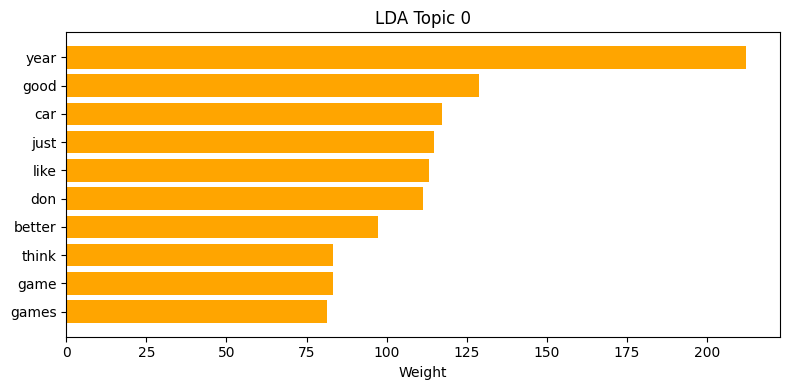

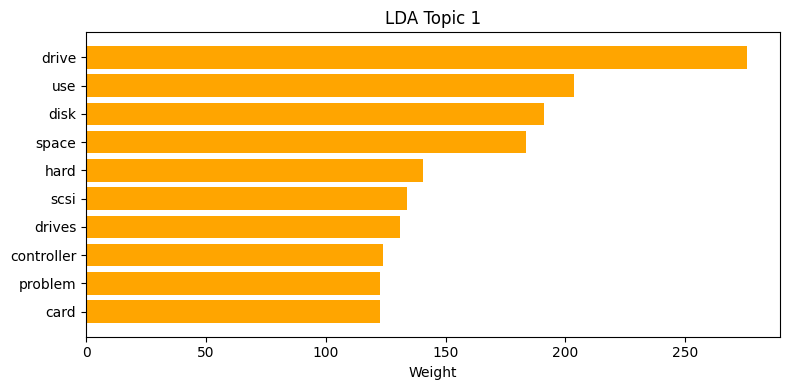

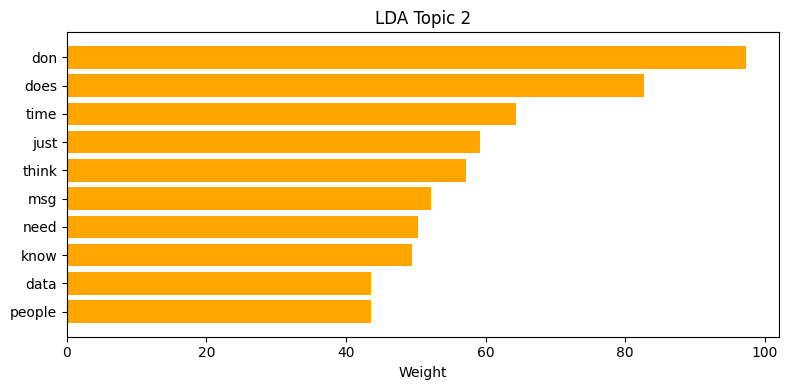

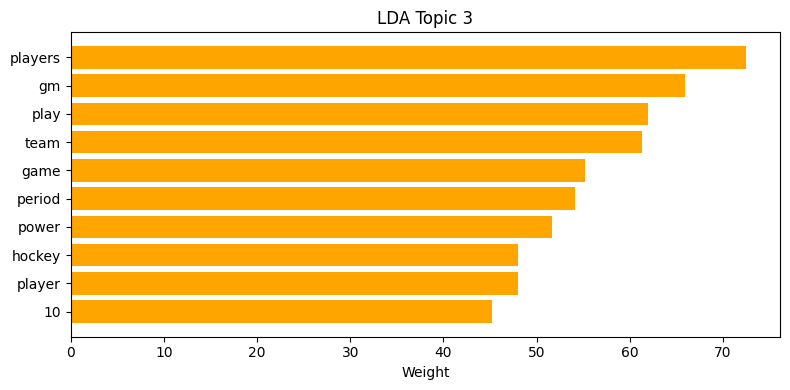

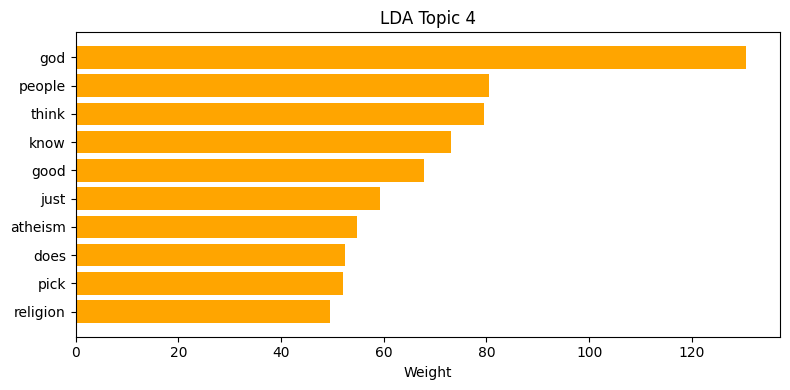

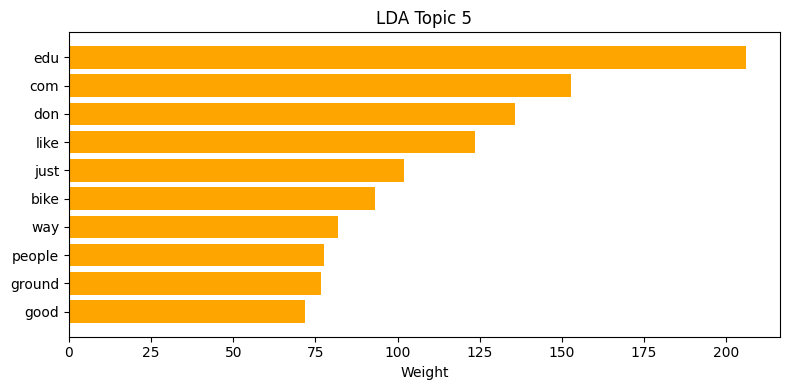

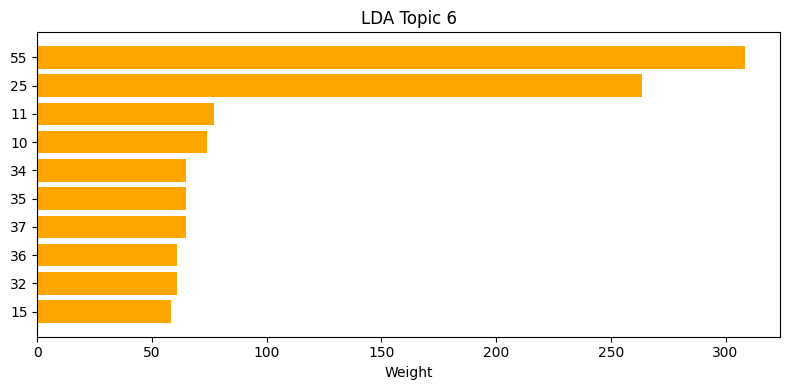

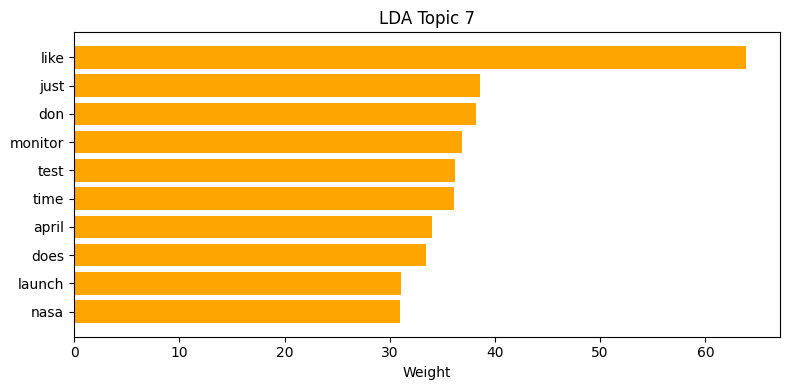

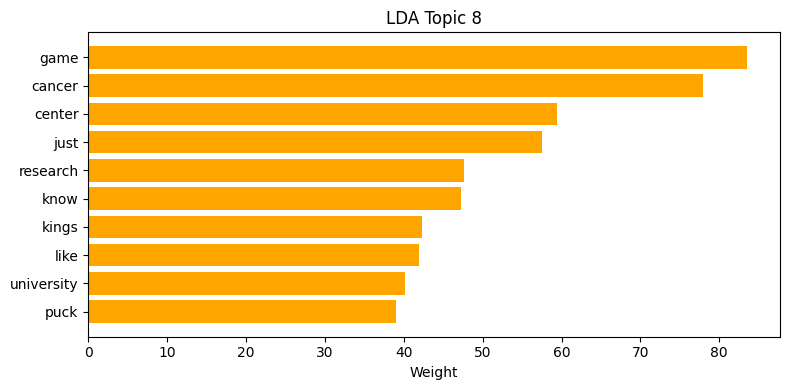

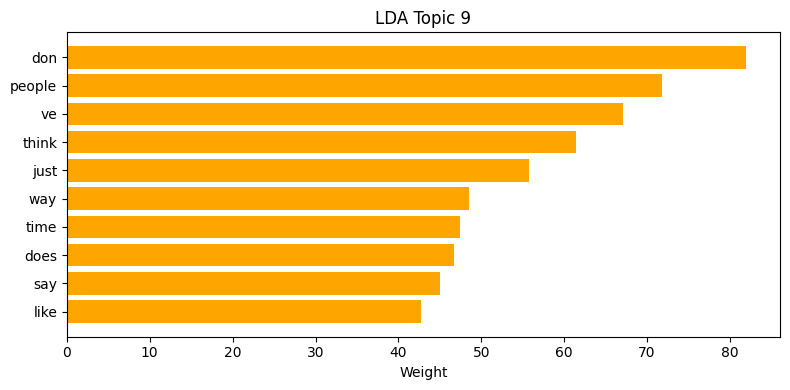

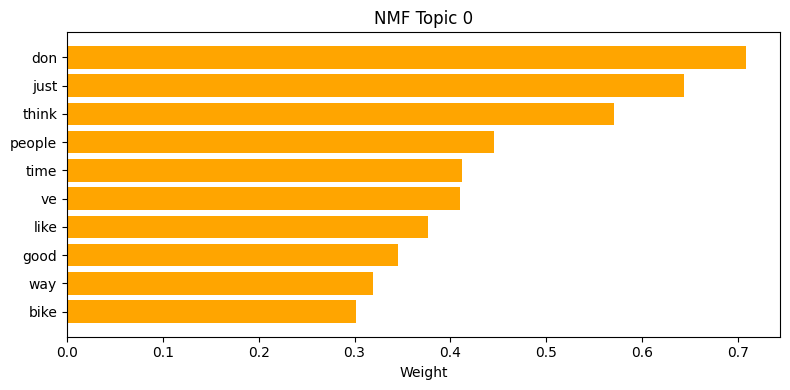

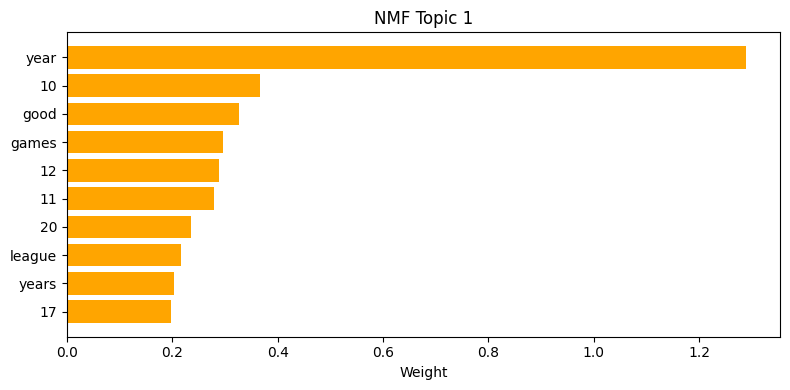

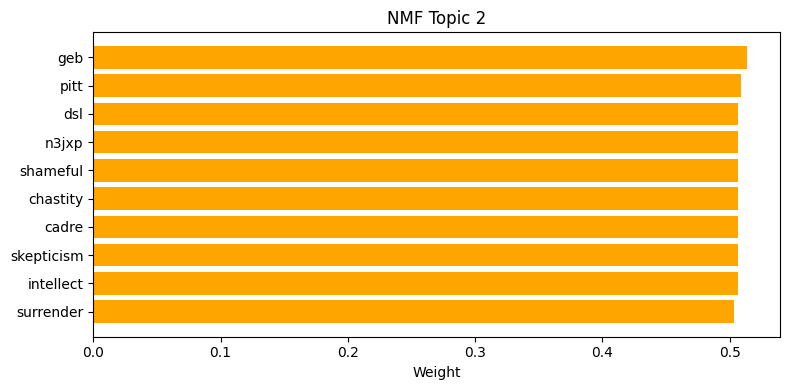

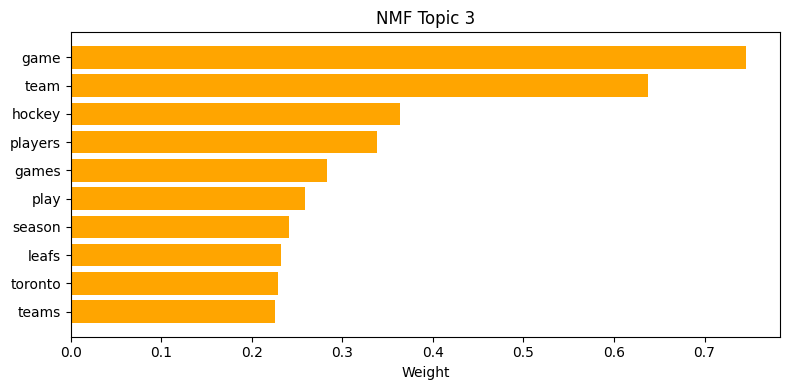

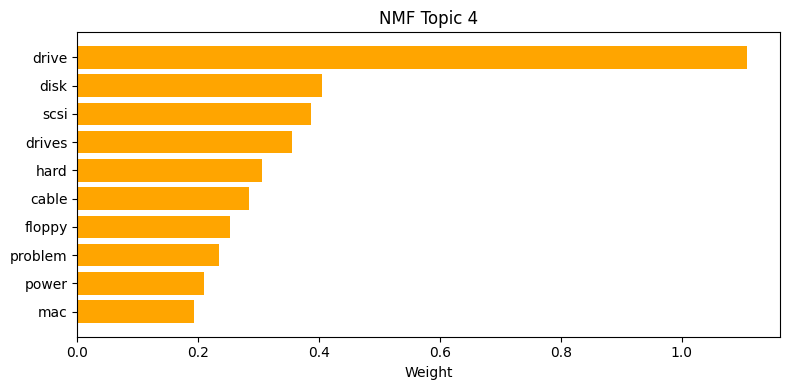

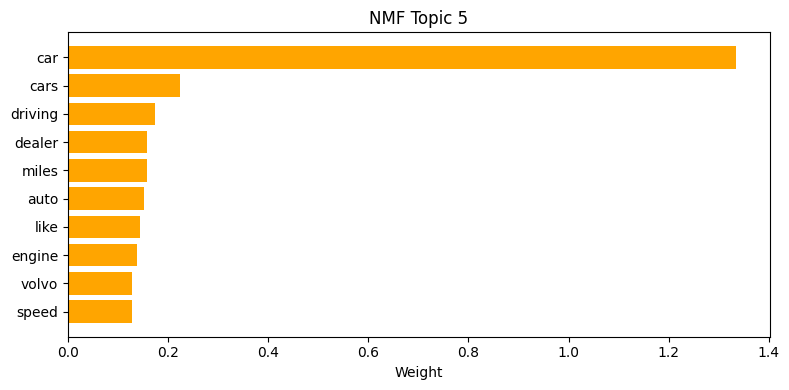

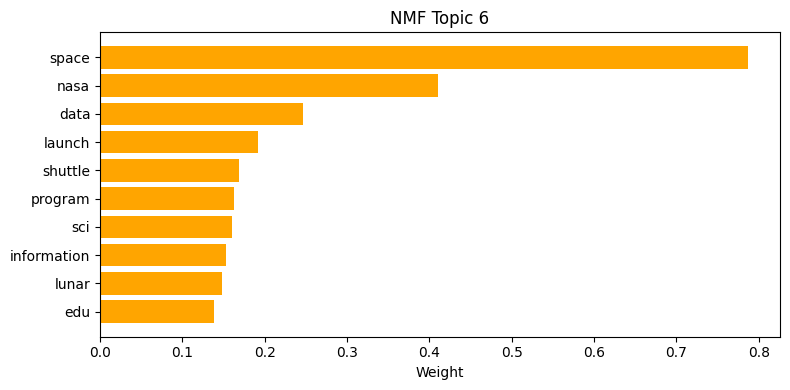

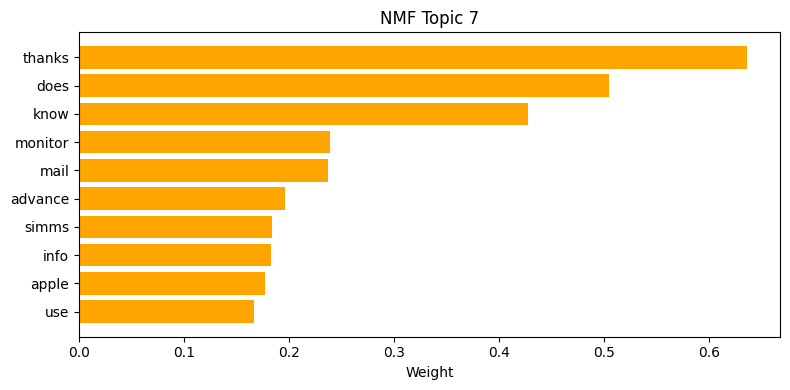

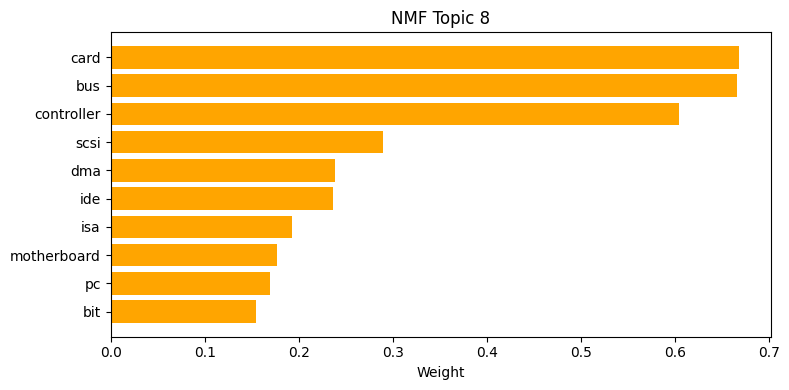

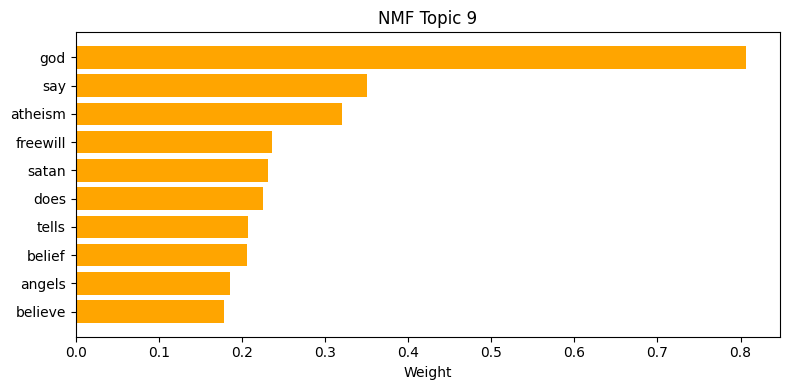

In [ ]:
# 6. Plot bar-charts for each topic
def plot_topics(topics, title):
    for i, topic in enumerate(topics):
        words, weights = zip(*topic)
        plt.figure(figsize=(8,4))
        plt.barh(range(len(words)), weights[::-1], color='orange')
        plt.yticks(range(len(words)), words[::-1])
        plt.title(f'{title} Topic {i}')
        plt.xlabel('Weight')
        plt.tight_layout()
        plt.show()

plot_topics(lda_topics, 'LDA')
plot_topics(nmf_topics, 'NMF')


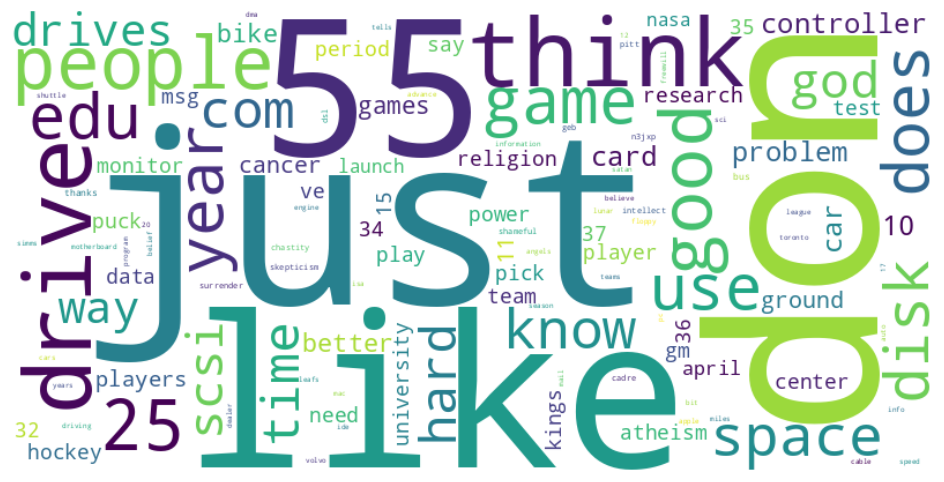

In [ ]:
# 7. Aggregate and draw a wordcloud
freq = defaultdict(float)
for tlist in (lda_topics, nmf_topics):
    for topic in tlist:
        for word, w in topic:
            freq[word] += w

wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(freq)
plt.figure(figsize=(15,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()